<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Lab: Exploratory Data Analysis**


Estimated time needed: **30** minutes


In this lab, you will work with a cleaned dataset to perform Exploratory Data Analysis or EDA. 


## Objectives


In this lab, you will perform the following:


- Examine the structure of a dataset.

- Handle missing values effectively.

- Conduct summary statistics on key columns.

- Analyze employment status, job satisfaction, programming language usage, and trends in remote work.


## Hands on Lab


#### Step 1: Install and Import Libraries


Install the necessary libraries for data manipulation and visualization.


In [2]:
!pip install pandas
!pip install matplotlib
!pip install seaborn

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Step 2: Load and Preview the Dataset
Load the dataset from the provided URL. Use df.head() to display the first few rows to get an overview of the structure.


In [3]:
# Load the Stack Overflow survey dataset
data_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv'
df = pd.read_csv(data_url)

# Set pandas option to display all columns
pd.set_option('display.max_columns', None)

# Display the first few rows of the dataset
df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,TechDoc,YearsCode,YearsCodePro,DevType,OrgSize,PurchaseInfluence,BuyNewTool,BuildvsBuy,TechEndorse,Country,Currency,CompTotal,LanguageHaveWorkedWith,LanguageWantToWorkWith,LanguageAdmired,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,DatabaseAdmired,PlatformHaveWorkedWith,PlatformWantToWorkWith,PlatformAdmired,WebframeHaveWorkedWith,WebframeWantToWorkWith,WebframeAdmired,EmbeddedHaveWorkedWith,EmbeddedWantToWorkWith,EmbeddedAdmired,MiscTechHaveWorkedWith,MiscTechWantToWorkWith,MiscTechAdmired,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,ToolsTechAdmired,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,NEWCollabToolsAdmired,OpSysPersonal use,OpSysProfessional use,OfficeStackAsyncHaveWorkedWith,OfficeStackAsyncWantToWorkWith,OfficeStackAsyncAdmired,OfficeStackSyncHaveWorkedWith,OfficeStackSyncWantToWorkWith,OfficeStackSyncAdmired,AISearchDevHaveWorkedWith,AISearchDevWantToWorkWith,AISearchDevAdmired,NEWSOSites,SOVisitFreq,SOAccount,SOPartFreq,SOHow,SOComm,AISelect,AISent,AIBen,AIAcc,AIComplex,AIToolCurrently Using,AIToolInterested in Using,AIToolNot interested in Using,AINextMuch more integrated,AINextNo change,AINextMore integrated,AINextLess integrated,AINextMuch less integrated,AIThreat,AIEthics,AIChallenges,TBranch,ICorPM,WorkExp,Knowledge_1,Knowledge_2,Knowledge_3,Knowledge_4,Knowledge_5,Knowledge_6,Knowledge_7,Knowledge_8,Knowledge_9,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,Frustration,ProfessionalTech,ProfessionalCloud,ProfessionalQuestion,Industry,JobSatPoints_1,JobSatPoints_4,JobSatPoints_5,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,I have never visited Stack Overflow or the Sta...,NaN,NaN,NaN,NaN,NaN,Yes,Very favorable,Increase productivity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,API document(s) and/or SDK document(s);User gu...,20,17,"Developer, full-stack",NaN,NaN,NaN,NaN,NaN,United Kingdom of Great Britain and Northern I...,NaN,NaN,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Dynamodb;MongoDB;PostgreSQL,PostgreSQL,PostgreSQL,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Express;Next.js;Node.js;React,Express;Htmx;Node.js;React;Remix,Express;Node.js;React,NaN,NaN,NaN,NaN,NaN,NaN,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,PyCharm;Visual Studio Code;WebStorm,PyCharm;Visual Studio Code;WebStorm,PyCharm;Visual Studio Code;WebStorm,MacOS;Windows,MacOS,NaN,NaN,NaN,Microsoft Teams;Slack,Slack,Slack,NaN,NaN,NaN,Stack Overflow for Teams (private knowledge sh...,Multiple times per day,Yes,Multiple times per day,Quickly finding code solutions;Finding reliabl...,"Yes, definitely","No, and I don't plan to",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Individual contributor,17.0,Agree,Disagree,Agree,Agree,Agree,Neither agree nor disa

#### Step 3: Handling Missing Data


Identify and manage missing values in critical columns such as `Employment`, `JobSat`, and `RemoteWork`. Implement a strategy to fill or drop these values, depending on the significance of the missing data.


In [4]:
## Write your code here
Missing_Employment=df['Employment'].isnull().sum()
Missing_JobSat=df['JobSat'].isnull().sum()
Missing_RemoteWork=df['RemoteWork'].isnull().sum()
print("No of missing values in Employment: ",Missing_Employment)
print("No of missing values in Job Satisfaction: ",Missing_JobSat)
print("No of missing values in Remote Work: ",Missing_RemoteWork)
#Choosing median might be more accurate for ordinal variable JobSat
JobSat_median=df['JobSat'].median()  
print("Replacing JobSat NA values with median value: ",JobSat_median)
df['JobSat']=df['JobSat'].fillna(JobSat_median)
#Choosing most frequently available variable will be right for Categorical Variable RemoteWork
RemoteWork_frequent=df['RemoteWork'].value_counts().sort_values().idxmax()
print("Replacing RemoteWork NA values with frequently occuring value: ",RemoteWork_frequent)
df['RemoteWork']=df['RemoteWork'].fillna(RemoteWork_frequent)
Missing_Employment=df['Employment'].isnull().sum()
Missing_JobSat=df['JobSat'].isnull().sum()
Missing_RemoteWork=df['RemoteWork'].isnull().sum()
print("No of missing values in Employment: ",Missing_Employment)
print("No of missing values in Job Satisfaction: ",Missing_JobSat)
print("No of missing values in Remote Work: ",Missing_RemoteWork)


No of missing values in Employment:  0
No of missing values in Job Satisfaction:  36311
No of missing values in Remote Work:  10631
Replacing JobSat NA values with median value:  7.0
Replacing RemoteWork NA values with frequently occuring value:  Hybrid (some remote, some in-person)
No of missing values in Employment:  0
No of missing values in Job Satisfaction:  0
No of missing values in Remote Work:  0


#### Step 4: Analysis of Experience and Job Satisfaction


Analyze the relationship between years of professional coding experience (`YearsCodePro`) and job satisfaction (`JobSat`). Summarize `YearsCodePro` and calculate median satisfaction scores based on experience ranges.

- Create experience ranges for `YearsCodePro` (e.g., `0-5`, `5-10`, `10-20`, `>20` years).

- Calculate the median `JobSat` for each range.

- Visualize the relationship using a bar plot or similar visualization.


object


<Axes: title={'center': 'Relationship between ExperienceLevel and JobSatisfaction'}, xlabel='ExperienceLevel'>

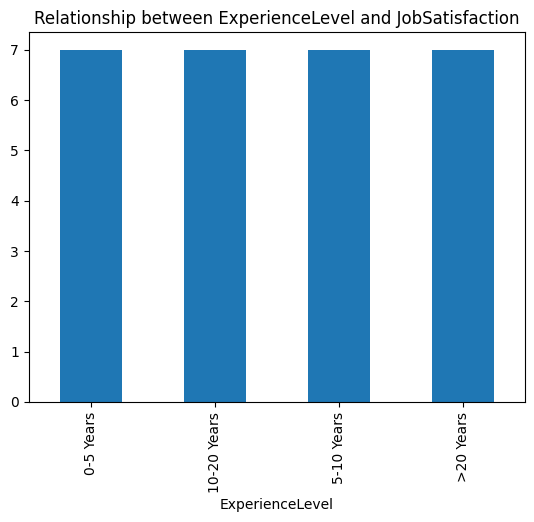

In [5]:
## Write your code here
import numpy as np
df=df.dropna(subset=['YearsCodePro'])
df['YearsCodePro']=df['YearsCodePro'].replace("Less than 1 year",1)
df['YearsCodePro']=df['YearsCodePro'].replace("More than 50 years",50)
print(df['YearsCodePro'].dtype)
df['YearsCodePro']=df['YearsCodePro'].astype('int')
conditions = [
    (df['YearsCodePro'] <= 5),
    (df['YearsCodePro'] > 5) & (df['YearsCodePro'] <= 10),
    (df['YearsCodePro'] > 10) & (df['YearsCodePro'] <= 20),
    (df['YearsCodePro'] > 20)
]
Levels = ['0-5 Years', '5-10 Years', '10-20 Years','>20 Years']

df['ExperienceLevel'] = np.select(conditions, Levels, default='unknown')
df['ExperienceLevel'].value_counts()
Ex_Levels=df.groupby('ExperienceLevel')['JobSat'].median()
Ex_Levels.plot(kind='bar',title='Relationship between ExperienceLevel and JobSatisfaction')

#### Step 5: Visualize Job Satisfaction


Use a count plot to show the distribution of `JobSat` values. This provides insights into the overall satisfaction levels of respondents.


<Axes: xlabel='JobSat', ylabel='count'>

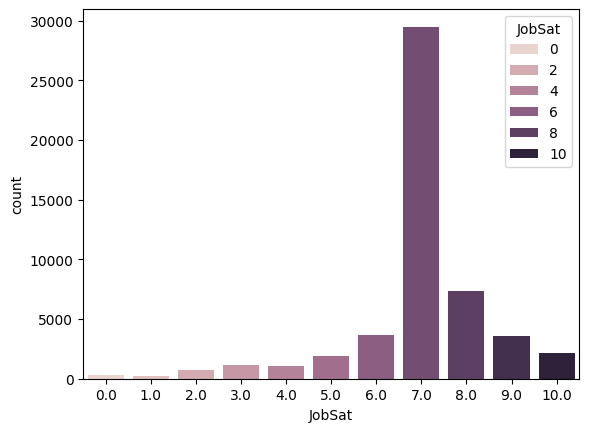

In [6]:
## Write your code here
#JobSat_Count=df['JobSat'].value_counts()
#sns.barplot(JobSat_Count)
sns.countplot(data=df,x='JobSat',hue='JobSat')

#### Step 6: Analyzing Remote Work Preferences by Job Role


Analyze trends in remote work based on job roles. Use the `RemoteWork` and `Employment` columns to explore preferences and examine if specific job roles prefer remote work more than others.

- Use a count plot to show remote work distribution.

- Cross-tabulate remote work preferences by employment type (e.g., full-time, part-time) and job roles.


<Axes: xlabel='RemoteWork', ylabel='count'>

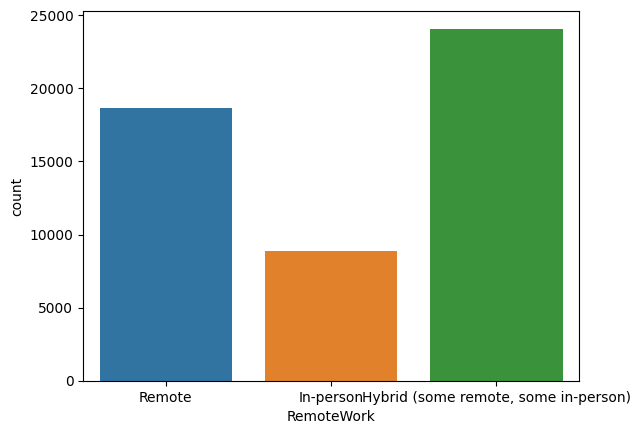

In [7]:
## Write your code here
sns.countplot(data=df,x='RemoteWork',hue='RemoteWork')


#### Step 7: Analyzing Programming Language Trends by Region


Analyze the popularity of programming languages by region. Use the `LanguageHaveWorkedWith` column to investigate which languages are most used in different regions.

- Filter data by country or region.

- Visualize the top programming languages by region with a bar plot or heatmap.


In [8]:
## Write your code here
# Split the column and expand into new columns
#df_split=df['LanguageHaveWorkedWith'].str.split(';', expand=True)
#Extract unique LanguageHaveWorkedWith 
#Languages=np.array(df_split.iloc[:,:].T.agg(pd.unique).explode().unique())
#print(Languages)
df_split=df[['Country','LanguageHaveWorkedWith']].copy()
df_merged=df_split['LanguageHaveWorkedWith'].str.get_dummies(sep=';')
df_new=df_split.join(df_merged)
df_new.drop(columns='LanguageHaveWorkedWith', inplace=True) 
df_new.groupby('Country').sum()
df_new.set_index(df_new.columns[0],inplace=True)
language_total=df_new.sum(axis=0)
top_10_languages=language_total.sort_values(ascending=False).head(10).index
df_top_10 = df_new[top_10_languages]
#plt.figure(figsize=(10, 6))
#sns.heatmap(df_top_10, annot=True, cmap="YlGnBu", fmt='d', linewidths=0.5, cbar=True)
#plt.title('Popularity of Programming Languages by Country')
#plt.xlabel('Programming Language')
#plt.ylabel('Country')
#plt.show()

#### Step 8: Correlation Between Experience and Satisfaction


Examine how years of experience (`YearsCodePro`) correlate with job satisfaction (`JobSatPoints_1`). Use a scatter plot to visualize this relationship.


<Axes: xlabel='YearsCodePro', ylabel='Group_by_Category'>

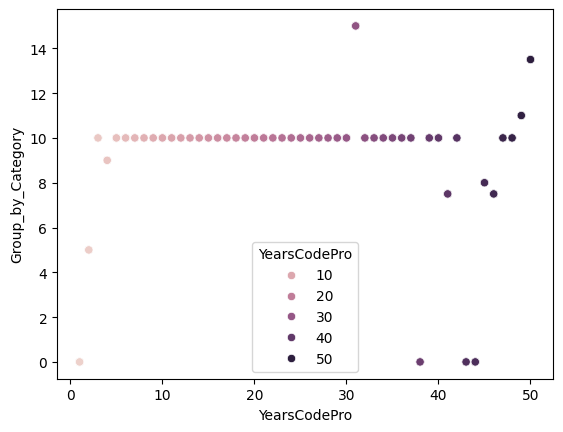

In [15]:
## Write your code here
df_Exp_Sat=df[['YearsCodePro','JobSatPoints_1']].copy()
df_Exp_Sat.set_index(df_Exp_Sat.columns[0])
df_Exp_Sat['Group_by_Category'] = df.groupby('YearsCodePro')['JobSatPoints_1'].transform('median')
#print(df['JobSatPoints_1'].value_counts())
sns.scatterplot(df_Exp_Sat,x='YearsCodePro',y='Group_by_Category',hue='YearsCodePro')

#### Step 9: Educational Background and Employment Type


Explore how educational background (`EdLevel`) relates to employment type (`Employment`). Use cross-tabulation and visualizations to understand if higher education correlates with specific employment types.


In [10]:
## Write your code here
df_Emp=df[['EdLevel','Employment']].copy()
df_split_employ=df_Emp['Employment'].str.get_dummies(sep=';')
df_Edu_Emp=df_Emp.join(df_split_employ)
df_Edu_Emp.drop(columns='Employment', inplace=True) 
df_Edu_Emp.groupby('EdLevel').sum()

,"Employed, full-time","Employed, part-time",I prefer not to say,"Independent contractor, freelancer, or self-employed","Not employed, and not looking for work","Not employed, but looking for work",Retired,"Student, full-time","Student, part-time"
EdLevel,,,,,,,,,
"Associate degree (A.A., A.S., etc.)",1189,106,1,277,9,89,4,108,76
"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",18344,1220,55,3464,113,1044,54,1419,711
"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",11863,704,40,2527,79,441,51,467,301
Primary/elementary school,176,40,5,103,8,31,3,69,19
"Professional degree (JD, MD, Ph.D, Ed.D, etc.)",2166,129,17,425,12,65,43,60,36
"Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)",1710,476,19,703,48,163,3,864,237
Some college/university study without earning a degree,4239,552,14,1454,61,348,32,760,374
Something else,401,53,26,113,7,41,7,50,37


#### Step 10: Save the Cleaned and Analyzed Dataset


After your analysis, save the modified dataset for further use or sharing.


In [11]:
## Write your code here


<h2>Summary</h2>


In this revised lab, you:

- Loaded and explored the structure of the dataset.

- Handled missing data effectively.

- Analyzed key variables, including working hours, job satisfaction, and remote work trends.

- Investigated programming language usage by region and examined the relationship between experience and satisfaction.

- Used cross-tabulation to understand educational background and employment type.


Copyright © IBM Corporation. All rights reserved.
